## Level Calculation

In [1]:
from logica import colab_logica

Could not import google.cloud.bigquery.
Could not import google.cloud.auth.
Could not import google.colab.widgets.


Query is stored at Level_sql variable.


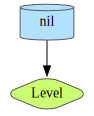

Running predicate: Level (0 seconds)
The following table is stored at Level variable.


,col0,col1
0,a,0
1,k,0
2,b,1
3,c,1
4,l,1
...,...,...
373,m,8
374,m,8
375,m,8
376,m,8


In [2]:
%%logica Level
@Engine("sqlite");

## Parent (parent, child)
Move("a","b");
Move("a","c");
Move("k","l");
Move("c","d");
Move("c","e");
Move("l","e");
Move("l","m");
Move("d","e");
Move("e","d");
Move("e","m");
Move("m","e");
Move("d","f");
Move("d","g");
Move("g","d");
Move("e","h");
Move("m","n");
Move("n","m");


## person who are not child (the root)
Root(x) distinct:- Move(x), ~Move(z, x);


# assign differnet number of levels to the celebrities
Level(x, 0) :- Root(x);
Level(y, level + 1) :- Move(x, y), Level(x, level);

In [3]:
df=Level.drop_duplicates()
idx=df.groupby('col0')['col1'].idxmin()
df_smallest = df.loc[idx].reset_index(drop=True)

In [4]:
df_smallest

,col0,col1
0,a,0
1,b,1
2,c,1
3,d,2
4,e,2
5,f,3
6,g,3
7,h,3
8,k,0
9,l,1


In [5]:
df_smallest.sort_values(by=df.columns[-1]).reset_index(drop=True)

,col0,col1
0,a,0
1,k,0
2,b,1
3,c,1
4,l,1
5,d,2
6,e,2
7,m,2
8,f,3
9,g,3
